In [1]:
import os
import numpy as np
from scipy.misc import imread
import pandas as pd
import matplotlib.pyplot as plt
import glob
from linear_model_MOM import *

### Test using tiny_imagenet database (4Mb of image used, the whole dataset weight 400Mb) that can be found https://tiny-imagenet.herokuapp.com/ or I could put it on the git.

In [2]:
f=imread('tiny_imagenet/n01443537/images/n01443537_0.JPEG')

In [3]:
np.shape(f)

(64, 64, 3)

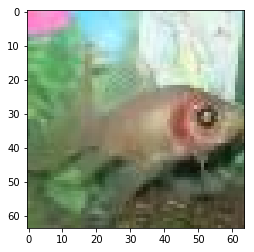

In [4]:
plt.imshow(f)
plt.show()

In [5]:
p=imread('tiny_imagenet/n02056570/images/n02056570_42.JPEG')

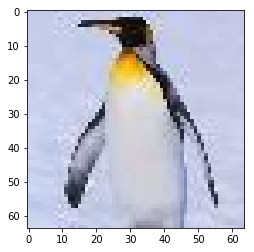

In [6]:
plt.imshow(p)
plt.show()

## Test tensorflow

In [7]:
from cnn_mom import CNN_MOM
files=glob.glob('tiny_imagenet/n01443537/images/*.JPEG')+glob.glob('tiny_imagenet/n02056570/images/*.JPEG')
y=np.hstack([np.ones(500),np.zeros(500)])
perm=np.random.permutation(1000)
y=y[perm]
files=np.array(files)[perm]
y=np.array(y)
train=list(range(int(9*len(y)/10)))
test=list(range(int(9*len(y)/10),len(y)))

In [8]:
import time
a=time.time()
clf=CNN_MOM(K=3,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 0.699  en environ  3.5674924850463867 s
Epoch: 51 cost = 0.274  en environ  179.23703980445862 s
Epoch: 101 cost = 0.153  en environ  354.52179408073425 s
Epoch: 151 cost = 0.132  en environ  531.0883674621582 s
Epoch: 201 cost = 0.101  en environ  705.9834973812103 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
886.8280429840088 s
Resultat :  0.96


### Résultats variant entre 0.93 et 0.99. Il faudrait augmenter epoch pour avoir des résultats plus stable et meilleurs (mais en plus de temps)

In [12]:
from mlp_mom_tf import mlp_MOM_image
a=time.time()
clf=mlp_MOM_image((200,80),K=3,learning_rate=5e-4,beta=2e-3,epochs=1500,epoch_count=300,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 1.602  en environ  0.6510310173034668 s
Epoch: 301 cost = 0.133  en environ  187.99509572982788 s
Epoch: 601 cost = 0.107  en environ  376.6070921421051 s
Epoch: 901 cost = 0.174  en environ  563.6848247051239 s
Epoch: 1201 cost = 0.069  en environ  750.7798163890839 s
Weights saved in graph_mlp.tf
INFO:tensorflow:Restoring parameters from graph_mlp.tf
939.2683327198029 s
Resultat :  0.92


## Essai avec outliers et comparaison a cnn normal

### Comparaison CNN

In [10]:

from cnn import CNN
a=time.time()
clf=CNN(channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 0.699  en environ  5.466879844665527 s
Epoch: 51 cost = 0.208  en environ  249.84086060523987 s
Epoch: 101 cost = 0.138  en environ  489.4436066150665 s
Epoch: 151 cost = 0.085  en environ  730.4445424079895 s
Epoch: 201 cost = 0.074  en environ  975.5301501750946 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
1213.184609413147 s
Resultat :  0.94


### Evaluation sur plusieurs tirage pour plus de compréhension.
on retire la bdd et on retire l'algo MOM qui comporte une permutation aléatoire.

In [9]:
resmom=[]
rescnn=[]
from cnn import CNN

for t in range(10):
    print(t)
    perm=np.random.permutation(1000)
    y=y[perm]
    files=np.array(files)[perm]
    train=list(range(int(9*len(y)/10)))
    test=list(range(int(9*len(y)/10),len(y)))

    a=time.time()
    clf=CNN_MOM(K=15,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
    clf.fit(files[train],y[train])
    pred=clf.predict(files[test])
    resmom+=[np.mean(y[test]==pred)]
    a=time.time()
    clf=CNN(channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
    clf.fit(files[train],y[train])
    pred=clf.predict(files[test])
    rescnn+=[np.mean(y[test]==pred)]

0
Epoch: 1 cost = 0.700  en environ  2.904125452041626 s
Epoch: 51 cost = 0.493  en environ  125.14533066749573 s
Epoch: 101 cost = 0.414  en environ  248.830317735672 s
Epoch: 151 cost = 0.382  en environ  370.9028296470642 s
Epoch: 201 cost = 0.347  en environ  492.00168204307556 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
Epoch: 1 cost = 0.698  en environ  5.017954111099243 s
Epoch: 51 cost = 0.173  en environ  253.77333521842957 s
Epoch: 101 cost = 0.146  en environ  496.17704224586487 s
Epoch: 151 cost = 0.160  en environ  736.6717882156372 s
Epoch: 201 cost = 0.138  en environ  983.7243812084198 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
1
Epoch: 1 cost = 0.699  en environ  2.296584129333496 s
Epoch: 51 cost = 0.255  en environ  116.6030592918396 s
Epoch: 101 cost = 0.214  en environ  233.62546062469482 s
Epoch: 151 cost = 0.160  en environ  350.382506608963 s
Epoch: 201 cost = 0.153  en enviro

In [13]:
from matplotlib import pyplot as plt

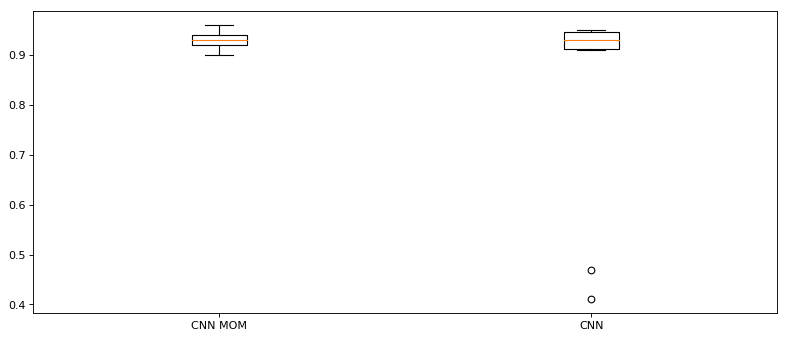

In [14]:
fig=plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.boxplot(np.array([resmom,rescnn]).T,labels=['CNN MOM','CNN'])
plt.show()

### Pas de perte de perf à priori, semble même enlever une instabilité, mais il faudrait augmenter le nombre d'epoch et le nombre de valeur dans le boxplot pour vraiment comparer.

### Gain de temps à faire mom cnn. Gain de temps et pas de perte de perf (à vérifier sur plusieurs autres cas). Regardons maintenant pour K plus grand pour avoir gain de temps encore plus gros (même si la bdd est "petite" pour un réseau de neuronnes donc on peut pas non plus prendre K énorme).

In [9]:
a=time.time()
clf=CNN_MOM(K=10,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 0.699  en environ  2.522101640701294 s
Epoch: 51 cost = 0.249  en environ  126.61403203010559 s
Epoch: 101 cost = 0.197  en environ  249.6293649673462 s
Epoch: 151 cost = 0.221  en environ  372.12046933174133 s
Epoch: 201 cost = 0.144  en environ  495.26307368278503 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
621.0213520526886 s
Resultat :  0.92


### Pour pousser plus loin cette étude il faudrait aussi regarder la taille des batch qu'ici j'ai prise égale à 1000 (valeur par défaut de l'argument batch_size) mais pour une bdd plus grande, la valeur de K devrait être couplée à la valeur de batch_size.

### Gain de temps substantiel qui pourrait être très intéressant même quand la base de donnée n'est pas corrompue.

### BDD corrompue : ajout de 7 grenouilles parmis les pingouins.

In [28]:
outliers=['tiny_imagenet/n01641577/images/n01641577_'+str(f)+'.JPEG' for f in range(1,8)]
files=glob.glob('tiny_imagenet/n01443537/images/*.JPEG')+glob.glob('tiny_imagenet/n02056570/images/*.JPEG')+outliers
y=np.hstack([np.ones(500),np.zeros(507)])
perm=np.random.permutation(1007)
y=y[perm]
files=np.array(files)[perm]
y=np.array(y)
train=list(range(int(9*len(y)/10)))
test=list(range(int(9*len(y)/10),len(y)))

In [29]:
print('CNN MOM')

a=time.time()
clf=CNN_MOM(K=15,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))


CNN MOM
Epoch: 1 cost = 0.699  en environ  2.426676034927368 s
Epoch: 51 cost = 0.414  en environ  114.18371152877808 s
Epoch: 101 cost = 0.213  en environ  224.06070852279663 s
Epoch: 151 cost = 0.165  en environ  334.3548996448517 s
Epoch: 201 cost = 0.174  en environ  444.600741147995 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
553.9403834342957 s
Resultat :  0.960396039604


In [30]:
print('CNN')
from cnn import CNN
a=time.time()
clf=CNN(channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

CNN
Epoch: 1 cost = 0.699  en environ  4.556044340133667 s
Epoch: 51 cost = 0.233  en environ  236.63149428367615 s
Epoch: 101 cost = 0.114  en environ  468.8208873271942 s
Epoch: 151 cost = 0.084  en environ  703.413078546524 s
Epoch: 201 cost = 0.075  en environ  937.7579476833344 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
1166.3443171977997 s
Resultat :  0.950495049505


### Evaluation sur plusieurs tirage pour plus de compréhension.
on retire la bdd et on retire l'algo MOM qui comporte une permutation aléatoire.

In [31]:
resmom=[]
rescnn=[]
from cnn import CNN

for t in range(10):
    print(t)
    perm=np.random.permutation(1007)
    y=y[perm]
    files=np.array(files)[perm]
    train=list(range(int(9*len(y)/10)))
    test=list(range(int(9*len(y)/10),len(y)))

    a=time.time()
    clf=CNN_MOM(K=15,channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
    clf.fit(files[train],y[train])
    pred=clf.predict(files[test])
    resmom+=[np.mean(y[test]==pred)]
    a=time.time()
    clf=CNN(channels=[16,32],final_layer_shape=80,learning_rate=1e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
    clf.fit(files[train],y[train])
    pred=clf.predict(files[test])
    rescnn+=[np.mean(y[test]==pred)]

0
Epoch: 1 cost = 0.698  en environ  2.225541591644287 s
Epoch: 51 cost = 0.671  en environ  112.2418303489685 s
Epoch: 101 cost = 0.264  en environ  222.28575372695923 s
Epoch: 151 cost = 0.222  en environ  333.1972813606262 s
Epoch: 201 cost = 0.213  en environ  442.99984765052795 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
Epoch: 1 cost = 0.699  en environ  4.795105218887329 s
Epoch: 51 cost = 0.694  en environ  236.93129754066467 s
Epoch: 101 cost = 0.693  en environ  467.78260803222656 s
Epoch: 151 cost = 0.693  en environ  697.884250164032 s
Epoch: 201 cost = 0.693  en environ  927.9676704406738 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
1
Epoch: 1 cost = 0.700  en environ  2.3659915924072266 s
Epoch: 51 cost = 0.485  en environ  111.6837739944458 s
Epoch: 101 cost = 0.215  en environ  221.00332689285278 s
Epoch: 151 cost = 0.194  en environ  330.6800434589386 s
Epoch: 201 cost = 0.165  en envi

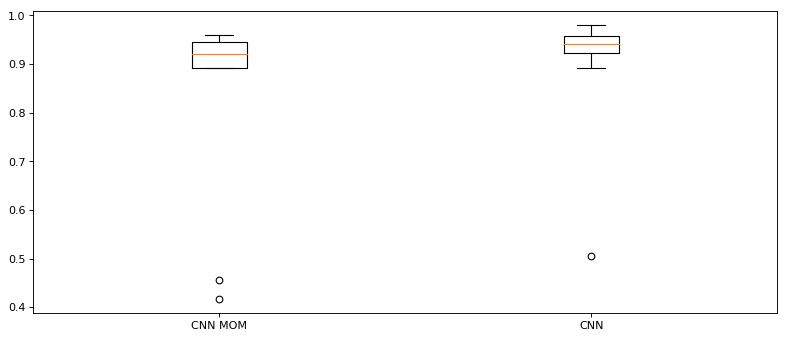

In [33]:
fig=plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.boxplot(np.array([resmom,rescnn]).T,labels=['CNN MOM','CNN'])
plt.show()

### Instabilité qui n'est pas due aux outliers mais à l'instabilité inhérante d'un réseau de neuronnes.